In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install pandas-datareader
!pip install tensorflow
!pip install scikit-learn

# Always add ! in google colab for pip installs

In [ ]:
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install --upgrade matplotlib
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 7.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


     |████████████████████████████████| 11.2 MB 6.7 MB/s 
     |████████████████████████████████| 873 kB 42.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 109 kB 8.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

Epoch 1/25
9/9 [==============================] - 6s 86ms/step - loss: 0.1385
Epoch 2/25
9/9 [==============================] - 1s 86ms/step - loss: 0.0315
Epoch 3/25
9/9 [==============================] - 1s 97ms/step - loss: 0.0249
Epoch 4/25
9/9 [==============================] - 1s 89ms/step - loss: 0.0189
Epoch 5/25
9/9 [==============================] - 1s 85ms/step - loss: 0.0156
Epoch 6/25
9/9 [==============================] - 1s 88ms/step - loss: 0.0156
Epoch 7/25
9/9 [==============================] - 1s 90ms/step - loss: 0.0160
Epoch 8/25
9/9 [==============================] - 1s 84ms/step - loss: 0.0128
Epoch 9/25
9/9 [==============================] - 1s 86ms/step - loss: 0.0142
Epoch 10/25
9/9 [==============================] - 1s 86ms/step - loss: 0.0157
Epoch 11/25
9/9 [==============================] - 1s 86ms/step - loss: 0.0136
Epoch 12/25
9/9 [==============================] - 1s 86ms/step - loss: 0.0133
Epoch 13/25
9/9 [==============================] - 1s 88ms/st

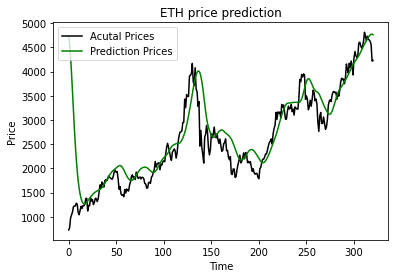

[[4726.5146]]


In [16]:
 # Crypto Currency to predict
crypto_currency = "ETH"

# The currency to predict against
against_currency = "USD"

# Time frame to look at the training data
start =dt.datetime(2021,1,1)

end = dt.datetime.now()

# Getting the acutal data from Yahoo with Pandas Datareader
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

# Prepare Data with Sklearn
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

# The amount of past days which will help the model to predict the future price
prediction_days = 60

# All we are doing here is getting data and then organising it

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Creating Neural Network with Sequential from tensorflow and LSTM

# 1) Create the model with Sequential
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Testing the Model
test_start = dt.datetime (2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data["Close"].values

total_dataset = pd.concat((data["Close"], test_data["Close"]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values 
model_inputs = model_inputs.reshape(-1, 1) 
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color="black", label="Acutal Prices")
plt.plot(prediction_prices, color="green", label="Prediction Prices")
plt.title(f'{crypto_currency} price prediction')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()


# If any problem occurs then downgrade numpy ---> pip install numpy==1.19.5


# # Predict Next Day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.insert (real_data,[0],[0.5],axis =1)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(prediction)

In [14]:
print (real_data)

[[[0.5       ]
  [0.5       ]
  [0.5       ]
  [0.54600167]
  [0.49833494]
  [0.5751253 ]
  [0.59415056]
  [0.53930738]
  [0.53781205]
  [0.57130276]
  [0.53991245]
  [0.50883675]
  [0.52006895]
  [0.55645941]
  [0.63138791]
  [0.65201113]
  [0.65854375]
  [0.64916791]
  [0.6830824 ]
  [0.69828272]
  [0.70009883]
  [0.69416614]
  [0.69709567]
  [0.66037977]
  [0.68965695]
  [0.67672594]
  [0.7045643 ]
  [0.74861743]
  [0.76738907]
  [0.75948733]
  [0.76358424]
  [0.73949041]
  [0.77106794]
  [0.83926011]
  [0.81435163]
  [0.79373755]
  [0.84309951]
  [0.82257863]
  [0.85442155]
  [0.83316215]
  [0.78395625]
  [0.87143445]
  [0.90265358]
  [0.88082548]
  [0.87161951]
  [0.88057474]
  [0.94431549]
  [0.94980215]
  [0.93268446]
  [0.92016987]
  [0.92882747]
  [0.95307549]
  [1.        ]
  [0.98113086]
  [0.95690221]
  [0.97998316]
  [0.96448258]
  [0.96064724]
  [0.95449749]
  [0.93762838]
  [0.85405119]
  [0.85636153]]]


In [ ]:
!pip install tweepy

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
BearerToken = "AAAAAAAAAAAAAAAAAAAAAFKGVwEAAAAAldhillpcmT3yxfnR7J8mFuV2tfI%3Ds1oKjRSmIZ6ySTTLDU7GfcJ90rsRrNTx1njznXEr7Jdu485ET2"
# Our Twitter Application Keys
consumer_key = 'eqjtkvnaMRM8dTK1WYZ4Pn458'
consumer_secret = 'TZZ95Y2DX4T6yOQX1Up4eAzXbbgyam68ZxOOZnlhkenU5qHIfH'

access_token = '253515066-LkN5Ovz6GCcMUBs99ddl3nbZMPr3bpwzZninriHt'
access_token_secret = 'WUkZrcoxOA9ofVOuFso45PBRhqwufFgf7AHnnggXAygDZ'

# Creat the Authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and the access token secret
auth.set_access_token(access_token, access_token_secret)

# Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# Get the tweets about the CryptoCurrency and filter our all the retweets
search_term = "#eth"

# Date Since we want to get the tweets
since_date = "2021-11-011"

# Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term).items(200)

# Store the tweets in a variable and get the full text
for tweet in tweets:
  print(tweet.text)

NameError: ignored